In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_a_path = '/content/drive/MyDrive/house_a_detected_anomalies/house_a_detected_anomalies.csv'
file_b_path = '/content/drive/MyDrive/house_b_detected_anomalies/house_b_detected_anomalies.csv'


data_a = pd.read_csv(file_a_path)
data_b = pd.read_csv(file_b_path)


# data_a_info = data_a.info(),
# data_b_info = data_b.info(),
data_a.head()
data_b.head()
# data_a_info, data_b_info


,Unnamed: 0.1,Unnamed: 0,contact_kitchen_cupboard_1,contact_kitchen_cupboard_2,contact_house_door,contact_wardrobe_door_1,contact_wardrobe_door_2,contact_shower_door,distance_tap,force_chair_1,...,pressure_mat_armchair,sonar_bathroom_door,sonar_kitchen,sonar_closet,Resident1,Resident2,Hour,Week,Day Of Week,Anomaly
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,11,0,1.0,1.0,False
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,11,11,0,1.0,1.0,False
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,11,11,0,1.0,1.0,False
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,11,11,0,1.0,1.0,False
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,11,11,0,1.0,1.0,False


In [11]:
print(data_a.describe)

<bound method NDFrame.describe of          Unnamed: 0  photocell_wardrobe  photocell_couch  ir_tv_receiver  \
0                 0                   0                0               0   
1                 1                   0                0               0   
2                 2                   0                0               0   
3                 3                   0                0               0   
4                 4                   0                0               0   
...             ...                 ...              ...             ...   
2591995       86395                   0                0               0   
2591996       86396                   0                0               0   
2591997       86397                   0                0               0   
2591998       86398                   0                0               0   
2591999       86399                   0                0               0   

         force_couch_1  force_couch_2  distance_chair

In [12]:
print(data_a.columns)
print(data_b.columns)

Index(['Unnamed: 0', 'photocell_wardrobe', 'photocell_couch', 'ir_tv_receiver',
       'force_couch_1', 'force_couch_2', 'distance_chair_1',
       'distance_chair_2', 'photocell_fridge', 'photocell_kitchen_drawer',
       'photocell_wardrobe_2', 'photocell_bathroom_cabinet',
       'contact_house_door', 'contact_bathroom_door', 'contact_shower_door',
       'sonar_hall', 'sonar_kitchen', 'distance_tap', 'distance_water_closet',
       'temperature_kitchen', 'force_bed', 'Resident1', 'Resident2', 'Hour',
       'Week', 'Day Of Week', 'Anomaly'],
      dtype='object')
Index(['Unnamed: 0.1', 'Unnamed: 0', 'contact_kitchen_cupboard_1',
       'contact_kitchen_cupboard_2', 'contact_house_door',
       'contact_wardrobe_door_1', 'contact_wardrobe_door_2',
       'contact_shower_door', 'distance_tap', 'force_chair_1', 'force_chair_2',
       'force_chair_3', 'photocell_fridge', 'photocell_kitchen_drawer',
       'pressure_mat_couch_1', 'pressure_mat_couch_2', 'pressure_mat_bed_1',
       'pr

## Time Series Analysis

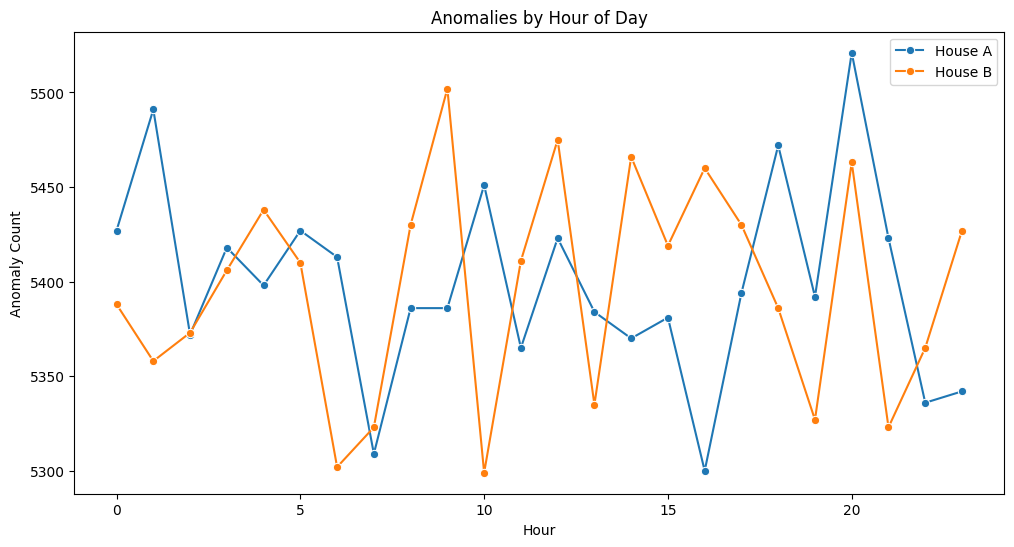

In [19]:
#Time Series Analysis
# Aggregate anomalies by day of the week for House A and House B
day_a = data_a.groupby('Hour')['Anomaly'].sum().reset_index()
day_b = data_b.groupby('Hour')['Anomaly'].sum().reset_index()
# Plot anomalies over hours
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_a, x='Hour', y='Anomaly', label='House A', marker='o')
sns.lineplot(data=day_b, x='Hour', y='Anomaly', label='House B', marker='o')
plt.title('Anomalies by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Anomaly Count')
plt.legend()
plt.show()


## Day Of The Week Analysis

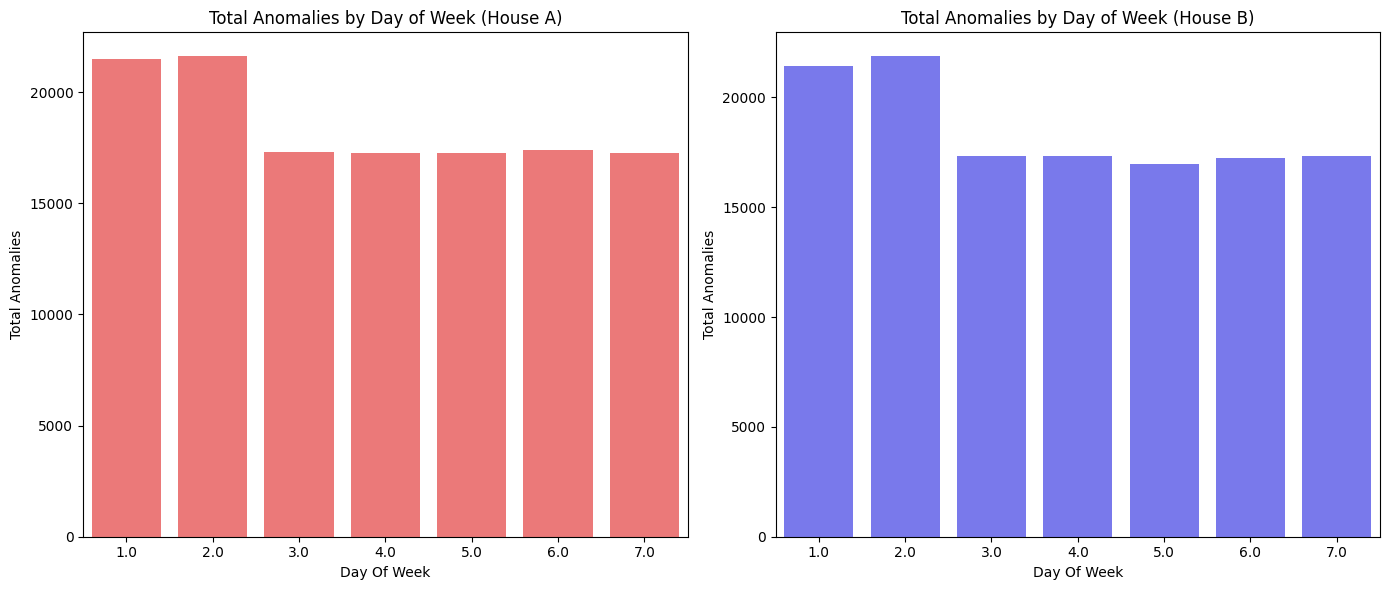

In [14]:
# Aggregate anomalies by day of the week for House A and House B
day_a = data_a.groupby('Day Of Week')['Anomaly'].sum().reset_index()
day_b = data_b.groupby('Day Of Week')['Anomaly'].sum().reset_index()

# Create subplots for separate visualization
plt.figure(figsize=(14, 6))

# Plot for House A
plt.subplot(1, 2, 1)
sns.barplot(data=day_a, x='Day Of Week', y='Anomaly', color='red', alpha=0.6)
plt.title('Total Anomalies by Day of Week (House A)')
plt.xlabel('Day Of Week')
plt.ylabel('Total Anomalies')

# Plot for House B
plt.subplot(1, 2, 2)
sns.barplot(data=day_b, x='Day Of Week', y='Anomaly', color='blue', alpha=0.6)
plt.title('Total Anomalies by Day of Week (House B)')
plt.xlabel('Day Of Week')
plt.ylabel('Total Anomalies')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



##Sensor Analysis

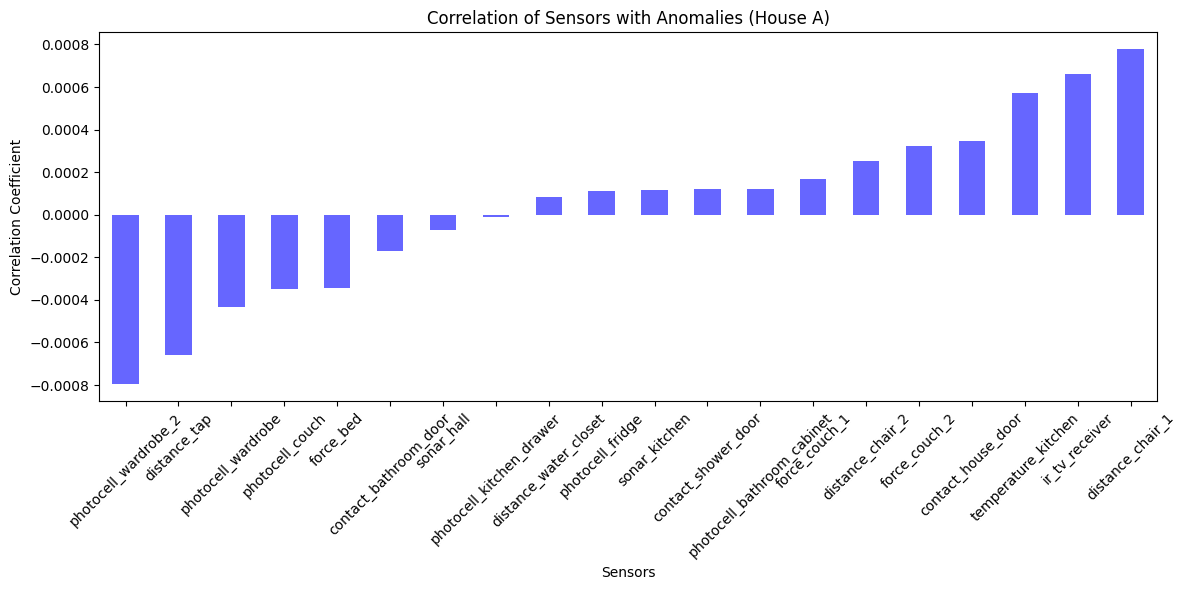

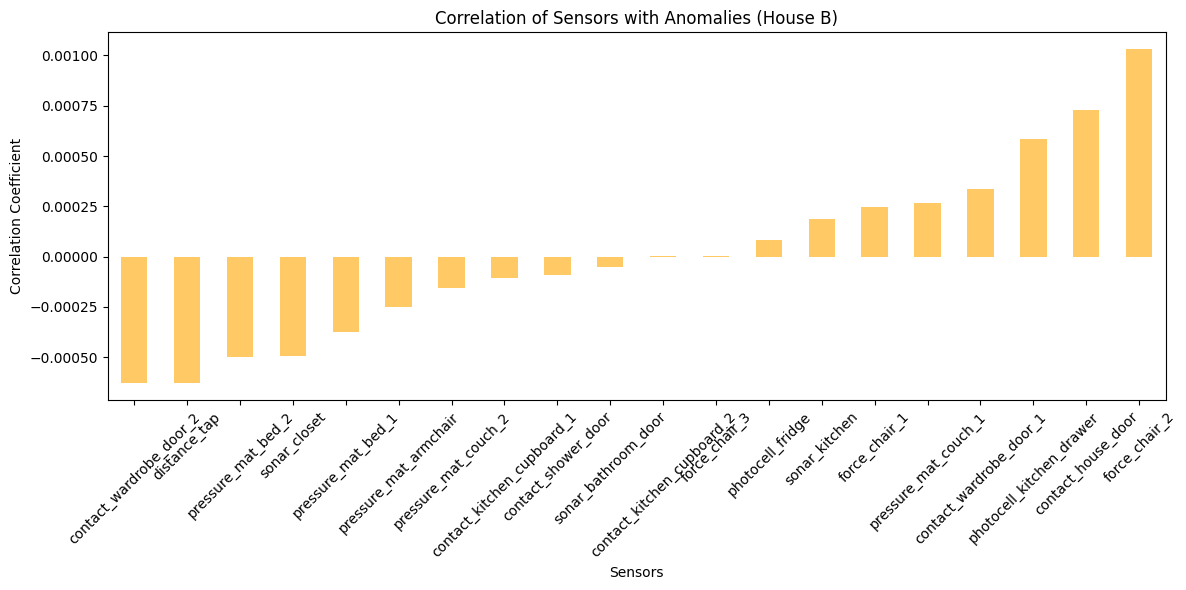

In [15]:

#Sensor Analysis
# Sensor columns for House A
sensor_columns_a = [
    'photocell_wardrobe', 'photocell_couch', 'ir_tv_receiver',
    'force_couch_1', 'force_couch_2', 'distance_chair_1', 'distance_chair_2',
    'photocell_fridge', 'photocell_kitchen_drawer', 'photocell_wardrobe_2',
    'photocell_bathroom_cabinet', 'contact_house_door', 'contact_bathroom_door',
    'contact_shower_door', 'sonar_hall', 'sonar_kitchen', 'distance_tap',
    'distance_water_closet', 'temperature_kitchen', 'force_bed'
]

# Sensor columns for House B
sensor_columns_b = [
    'contact_kitchen_cupboard_1', 'contact_kitchen_cupboard_2', 'contact_house_door',
    'contact_wardrobe_door_1', 'contact_wardrobe_door_2', 'contact_shower_door',
    'distance_tap', 'force_chair_1', 'force_chair_2', 'force_chair_3',
    'photocell_fridge', 'photocell_kitchen_drawer', 'pressure_mat_couch_1',
    'pressure_mat_couch_2', 'pressure_mat_bed_1', 'pressure_mat_bed_2',
    'pressure_mat_armchair', 'sonar_bathroom_door', 'sonar_kitchen', 'sonar_closet'
]

# Calculate correlations for House A
correlation_a = data_a[sensor_columns_a + ['Anomaly']].corr()['Anomaly'].sort_values()

# Calculate correlations for House B
correlation_b = data_b[sensor_columns_b + ['Anomaly']].corr()['Anomaly'].sort_values()
# Plot correlations for House A
plt.figure(figsize=(12, 6))
correlation_a.drop('Anomaly').plot(kind='bar', color='blue', alpha=0.6)
plt.title('Correlation of Sensors with Anomalies (House A)')
plt.xlabel('Sensors')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot correlations for House B
plt.figure(figsize=(12, 6))
correlation_b.drop('Anomaly').plot(kind='bar', color='orange', alpha=0.6)
plt.title('Correlation of Sensors with Anomalies (House B)')
plt.xlabel('Sensors')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Weekly Anomalies combined

Total anomalies in House A: 129581
Total anomalies in House B: 129516


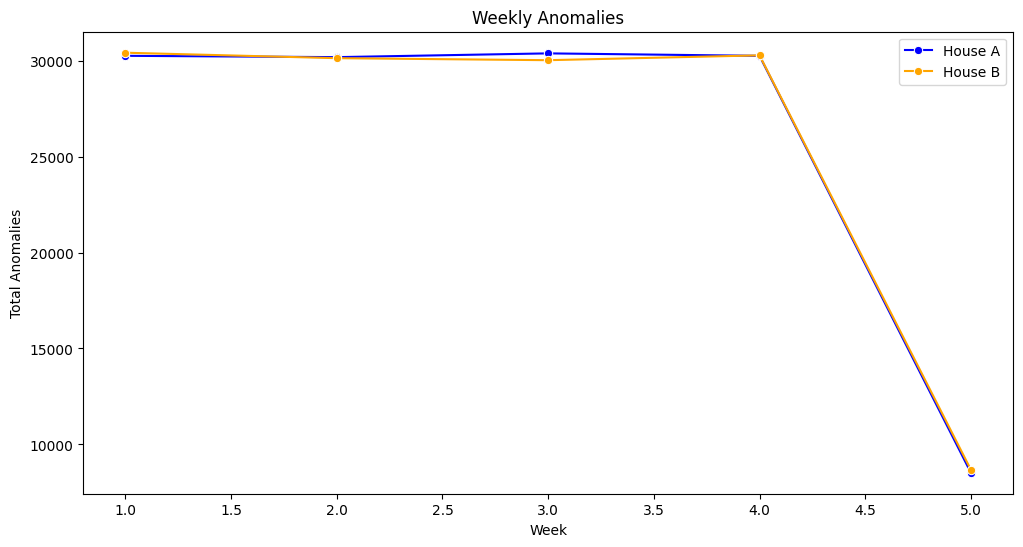

In [29]:
# Check how many anomalies exist for each house
print(f"Total anomalies in House A: {data_a['Anomaly'].sum()}")
print(f"Total anomalies in House B: {data_b['Anomaly'].sum()}")

# Aggregate anomalies by week
week_a = data_a.groupby('Week')['Anomaly'].sum().reset_index()
week_b = data_b.groupby('Week')['Anomaly'].sum().reset_index()

# Plot the anomalies for both houses
plt.figure(figsize=(12, 6))
sns.lineplot(data=week_a, x='Week', y='Anomaly', label='House A', marker='o', color='blue')
sns.lineplot(data=week_b, x='Week', y='Anomaly', label='House B', marker='o', color='orange')
plt.title('Weekly Anomalies')
plt.xlabel('Week')
plt.ylabel('Total Anomalies')
plt.legend()
plt.show()


## Correlation Heatmap

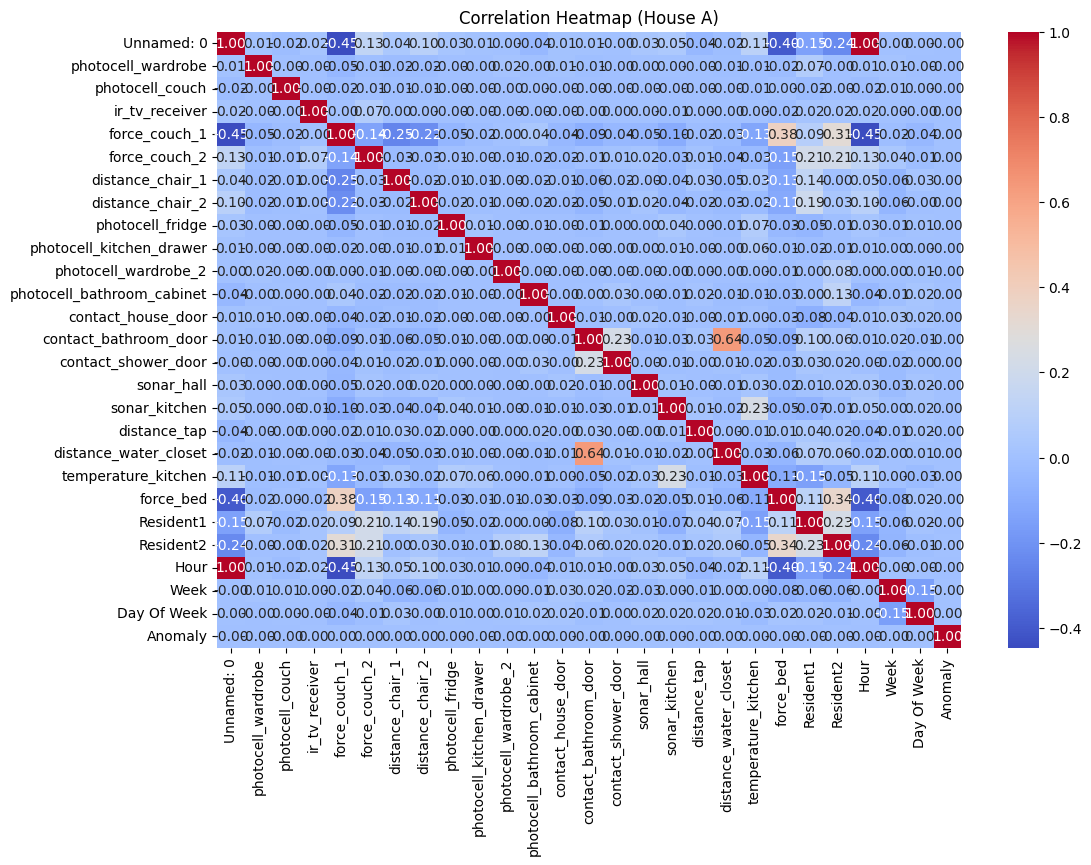

In [21]:
# Correlation Heatmap for House A
plt.figure(figsize=(12, 8))
sns.heatmap(data_a.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (House A)')
plt.show()



## Plotting distribution of anomalies by hour for House A

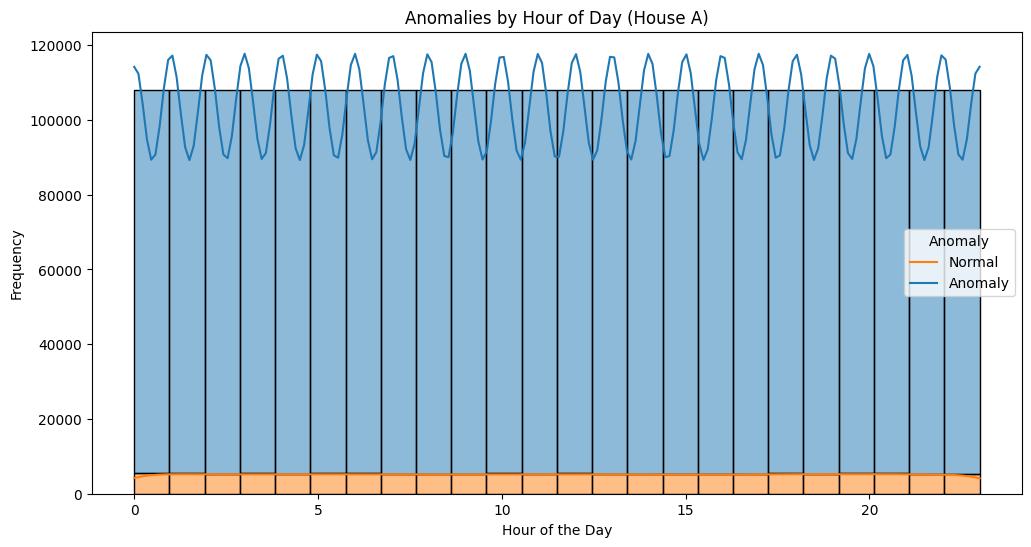

In [22]:
# Plotting distribution of anomalies by hour for House A
plt.figure(figsize=(12, 6))
sns.histplot(data_a, x='Hour', hue='Anomaly', multiple='stack', kde=True, bins=24, color='red')
plt.title('Anomalies by Hour of Day (House A)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

## Anomalies by Resident (For Both Houses)

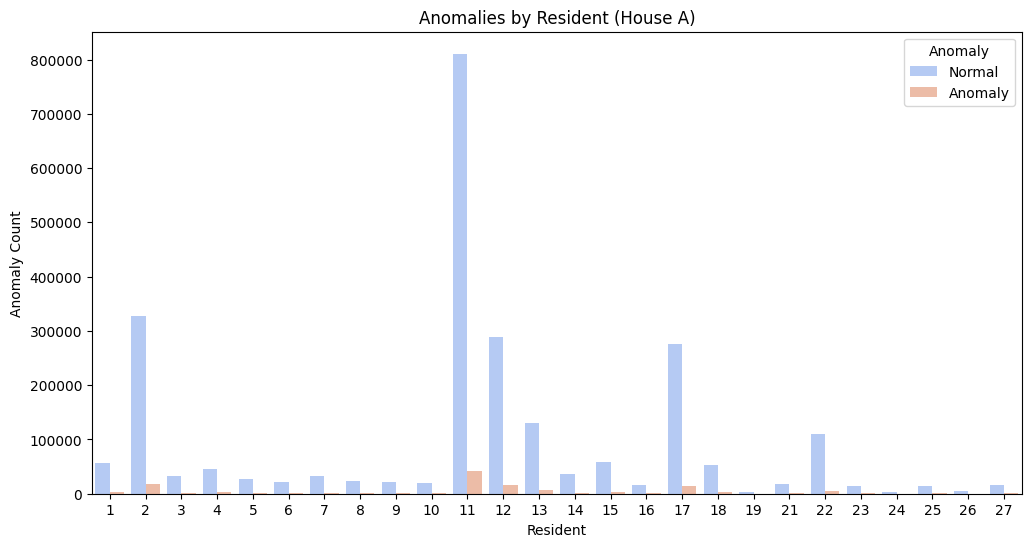

In [23]:
# Plotting anomalies by Resident for House A
plt.figure(figsize=(12, 6))
sns.countplot(data=data_a, x='Resident1', hue='Anomaly', palette='coolwarm')
plt.title('Anomalies by Resident (House A)')
plt.xlabel('Resident')
plt.ylabel('Anomaly Count')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

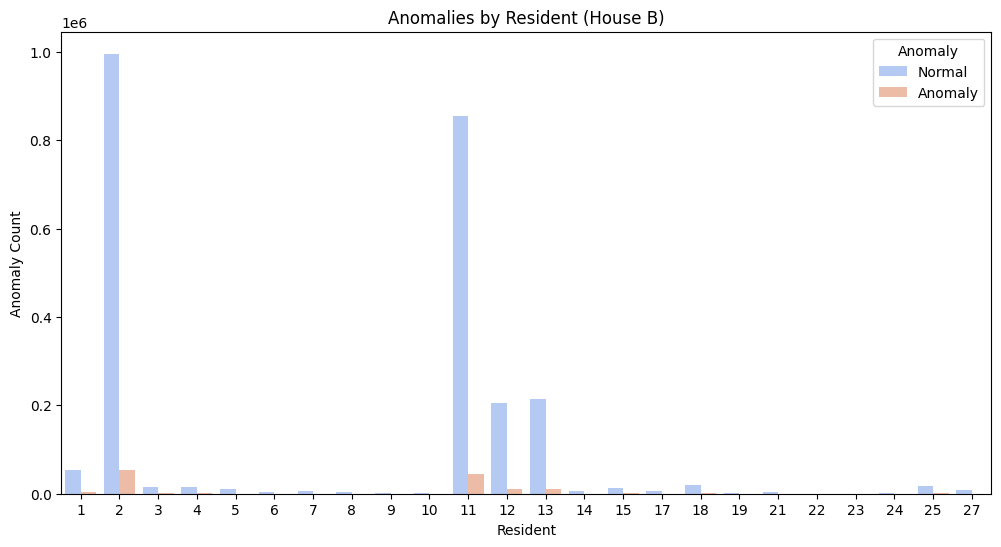

In [24]:
# Plotting anomalies by Resident for House B
plt.figure(figsize=(12, 6))
sns.countplot(data=data_b, x='Resident1', hue='Anomaly', palette='coolwarm')
plt.title('Anomalies by Resident (House B)')
plt.xlabel('Resident')
plt.ylabel('Anomaly Count')
plt.legend(title='Anomaly', labels=['Normal', 'Anomaly'])
plt.show()

##  Line Plot for Force Values (For Both Houses)

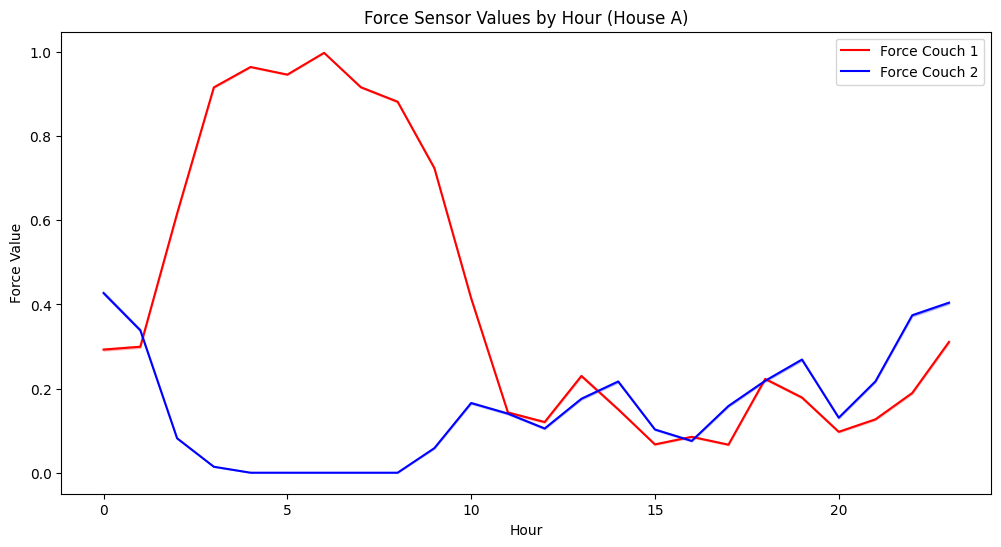

In [25]:
# Plotting force values for House A
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_a, x='Hour', y='force_couch_1', label='Force Couch 1', color='red')
sns.lineplot(data=data_a, x='Hour', y='force_couch_2', label='Force Couch 2', color='blue')
plt.title('Force Sensor Values by Hour (House A)')
plt.xlabel('Hour')
plt.ylabel('Force Value')
plt.legend()
plt.show()

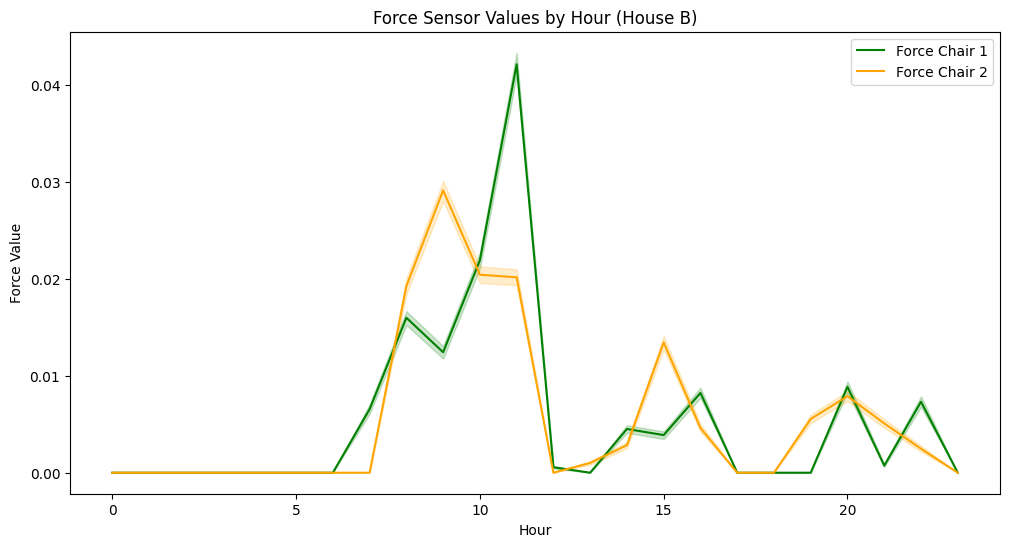

In [26]:
# Plotting force values for House B
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_b, x='Hour', y='force_chair_1', label='Force Chair 1', color='green')
sns.lineplot(data=data_b, x='Hour', y='force_chair_2', label='Force Chair 2', color='orange')
plt.title('Force Sensor Values by Hour (House B)')
plt.xlabel('Hour')
plt.ylabel('Force Value')
plt.legend()
plt.show()

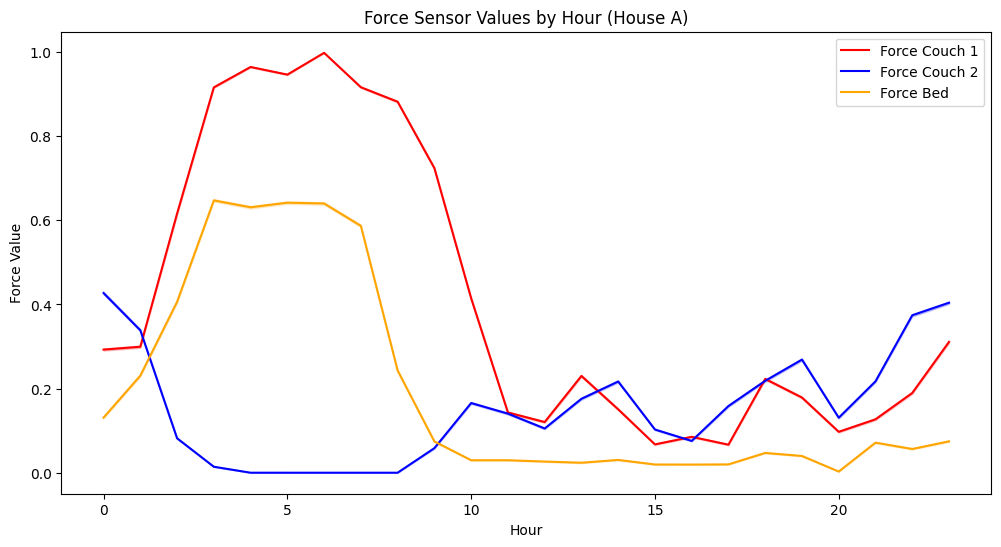

In [27]:
# Plotting force values for House A
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_a, x='Hour', y='force_couch_1', label='Force Couch 1', color='red')
sns.lineplot(data=data_a, x='Hour', y='force_couch_2', label='Force Couch 2', color='blue')
sns.lineplot(data=data_a, x='Hour', y='force_bed', label='Force Bed', color='orange')

plt.title('Force Sensor Values by Hour (House A)')
plt.xlabel('Hour')
plt.ylabel('Force Value')
plt.legend()
plt.show()